## Proyek Klasifikasi Gambar Menggunakan TensorFlow
**Nama : Abil Tio Kenda**  


Proyek ini bertujuan untuk melakukan klasifikasi gambar tangan yang menunjukkan tiga gestur: rock, paper, dan scissor, menggunakan TensorFlow. Data yang digunakan berasal dari dataset rockpaperscissors yang tersedia di [sini](https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip).

### Kriteria Proyek
1. **Dataset dan Pembagian**: Dataset dibagi menjadi train set dan validation set, di mana ukuran validation set adalah 40% dari total dataset.
2. **Augmentasi Gambar**: Implementasi augmentasi gambar dilakukan untuk meningkatkan variasi data dan mencegah overfitting.
3. **Image Data Generator**: Penggunaan Image Data Generator untuk memuat dan memproses gambar dari direktori dataset.
4. **Model Sequential**: Model menggunakan struktur sequential dengan berbagai layer konvolusi dan fully connected.
5. **Batas Waktu Pelatihan**: Pelatihan model tidak melebihi waktu 30 menit untuk memastikan efisiensi.
6. **Google Colaboratory**: Program dikerjakan pada Google Colaboratory untuk memanfaatkan sumber daya komputasi yang besar.
7. **Akurasi Minimal 85%**: Model harus memiliki akurasi minimal 85% untuk dapat digunakan secara efektif.
8. **Prediksi Gambar yang Diunggah**: Pengguna dapat mengunggah gambar tangan mereka sendiri ke Colab untuk diprediksi oleh model yang telah dilatih.

Dengan memenuhi kriteria di atas, proyek ini bertujuan untuk memberikan model klasifikasi gambar yang efektif dan dapat diandalkan untuk mengenali gestur tangan rock, paper, dan scissor.



In [1]:
# Import library yang diperlukan
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('File uploaded:', filename)


Saving rockpaperscissors.zip to rockpaperscissors (2).zip
File uploaded: rockpaperscissors (2).zip


In [3]:
# Ekstrak file zip
zip_ref = zipfile.ZipFile('rockpaperscissors.zip', 'r')
zip_ref.extractall()
zip_ref.close()

# Tampilkan daftar file yang diekstrak
print('Files extracted:', os.listdir())


Files extracted: ['.config', '0Flw60Z2MAWWKn6S.png', 'rockpaperscissors (1).zip', 'rockpaperscissors.zip', 'rockpaperscissors (2).zip', 'IdrewaHdlHRrNHbJ.png', '0OEXfEooCXlljaEl.png', '.ipynb_checkpoints', 'rockpaperscissors', '__MACOSX', 'sample_data']


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan path ke folder rps-cv-images
data_dir = 'rockpaperscissors/rps-cv-images'

# Pembagian dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
# Daftar kelas yang digunakan oleh model
class_names = list(train_generator.class_indices.keys())
print("Daftar kelas yang digunakan oleh model:")
print(class_names)


Daftar kelas yang digunakan oleh model:
['paper', 'rock', 'scissors']


In [6]:
from tensorflow.keras import regularizers
# Membangun model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Dropout dengan probabilitas 0.5
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [7]:
#Compile Model: Compile model dengan fungsi loss, optimizer, dan metrik yang sesuai.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
#Pelatihan Model: Latih model dengan data train dan validasi.
history = model.fit(
    train_generator,
    steps_per_epoch=41, # 1314 data train / 32 batch
    epochs=10,# Jumlah kali seluruh dataset akan dilalui oleh model selama pelatihan
    validation_data=validation_generator,
    validation_steps=27, #874 data validation(test) / 32 batch
    verbose=2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)


Epoch 1/10
41/41 - 165s - loss: 3.2280 - accuracy: 0.4454 - val_loss: 1.2793 - val_accuracy: 0.6481 - 165s/epoch - 4s/step
Epoch 2/10
41/41 - 156s - loss: 1.0923 - accuracy: 0.7020 - val_loss: 0.8991 - val_accuracy: 0.7604 - 156s/epoch - 4s/step
Epoch 3/10
41/41 - 156s - loss: 0.9722 - accuracy: 0.7301 - val_loss: 0.8027 - val_accuracy: 0.8287 - 156s/epoch - 4s/step
Epoch 4/10
41/41 - 155s - loss: 0.7925 - accuracy: 0.8261 - val_loss: 0.6520 - val_accuracy: 0.8900 - 155s/epoch - 4s/step
Epoch 5/10
41/41 - 140s - loss: 0.6959 - accuracy: 0.8643 - val_loss: 0.6119 - val_accuracy: 0.8924 - 140s/epoch - 3s/step
Epoch 6/10
41/41 - 157s - loss: 0.6697 - accuracy: 0.8658 - val_loss: 0.5661 - val_accuracy: 0.9016 - 157s/epoch - 4s/step
Epoch 7/10
41/41 - 139s - loss: 0.6204 - accuracy: 0.8799 - val_loss: 0.5227 - val_accuracy: 0.9271 - 139s/epoch - 3s/step
Epoch 8/10
41/41 - 157s - loss: 0.5730 - accuracy: 0.8963 - val_loss: 0.5369 - val_accuracy: 0.9109 - 157s/epoch - 4s/step
Epoch 9/10
41/41

**Loss dan Akurasi:** Loss pada data pelatihan dan data validasi berkurang secara konsisten seiring berjalannya epoch, dan akurasi meningkat. Hal ini menunjukkan bahwa model sedang belajar dengan baik dan mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

**Akurasi Tinggi:** Akurasi pada data pelatihan dan data validasi cukup tinggi, dengan nilai akurasi di atas **90%** pada beberapa epoch terakhir. Hal ini menunjukkan bahwa model mampu mengenali pola pada data dengan baik.

**Dropout dan Regularisasi:** Penggunaan dropout dengan probabilitas 0.5 dan regularisasi L2 dengan faktor 0.01 tampaknya membantu mengurangi overfitting. Hal ini terlihat dari perbedaan antara akurasi data pelatihan dan data validasi yang tidak terlalu besar, menunjukkan bahwa model tidak terlalu "overfit" pada data pelatihan.

**Early Stopping:** Callback Early Stopping dengan kesabaran (patience) 2, tetapi pelatihan tidak berhenti sebelum epoch ke-10 karena tidak ada peningkatan yang signifikan dalam metrik yang dipantau.

Secara keseluruhan, model tampaknya memberikan hasil yang baik dengan penggunaan teknik dropout dan regularisasi. Namun, dapat dicoba variasi lain dalam arsitektur model atau teknik regularisasi untuk melihat apakah dapat meningkatkan kinerja lebih lanjut.





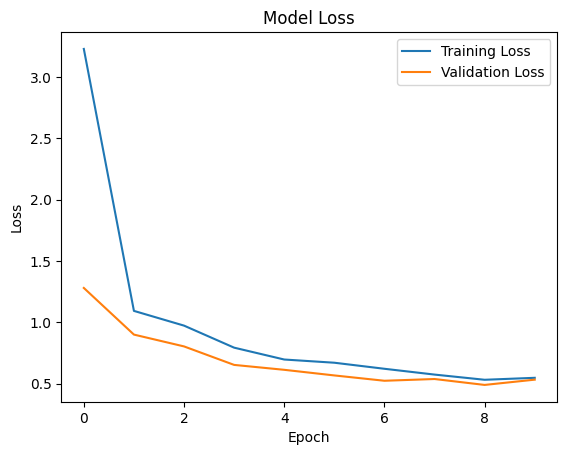

In [9]:
import matplotlib.pyplot as plt

# Plot kurva loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Berdasarkan gambaran tersebut, kita dapat membuat beberapa kesimpulan:

**Penurunan Loss:** Kurva loss pada data pelatihan dan data validasi mengalami penurunan yang cukup signifikan seiring dengan berjalannya epoch. Hal ini menunjukkan bahwa model terus mempelajari pola-pola yang relevan dalam data dan menyesuaikan bobotnya secara tepat.

**Kestabilan**: Pada akhir epoch, kurva loss pada kedua dataset cenderung melandai atau bahkan mendatar. Ini menandakan bahwa model sudah cukup konvergen dan tidak lagi mengalami penurunan yang signifikan dalam loss. Ini adalah indikator bahwa model sudah mencapai performa yang optimal dengan kemampuan generalisasi yang baik.

**Kesesuaian:** Adanya kesenjangan yang kecil antara loss pada data pelatihan dan data validasi menandakan bahwa model memiliki kemampuan yang baik untuk menggeneralisasi pola yang dipelajari dari data pelatihan ke data baru.

**Kesimpulan:** Berdasarkan bentuk kurva loss yang mengalami penurunan yang stabil dan melandai pada akhir epoch, dapat disimpulkan bahwa model telah berhasil dilatih dengan baik dan memiliki kemampuan untuk mengklasifikasikan data dengan akurat tanpa mengalami overfitting.

In [10]:
#Evaluasi Model: Evaluasi akurasi model dan pastikan mencapai minimal 85%.
val_loss, val_accuracy = model.evaluate(validation_generator)


28/28 [==============================] - 24s 845ms/step - loss: 0.5492 - accuracy: 0.9073


Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png


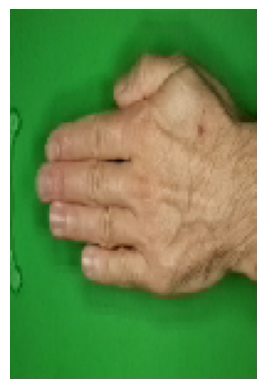

1/1 [==============================] - 0s 47ms/step
Predicted class: paper


In [14]:
import matplotlib.pyplot as plt

# Memungkinkan pengguna mengunggah gambar
uploaded = files.upload()

# Mengambil gambar yang diunggah
for filename in uploaded.keys():
    uploaded_file = filename
    break  # Hanya mengambil satu gambar jika pengguna mengunggah lebih dari satu

# Memuat gambar yang akan diprediksi
img = tf.keras.preprocessing.image.load_img(uploaded_file, target_size=(150, 100))
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Menampilkan gambar yang diunggah
plt.imshow(img_array.astype(int))
plt.axis('off')
plt.show()

# Tambahkan dimensi batch
img_array = tf.expand_dims(img_array, 0)

# Prediksi kelas gambar
predictions = model.predict(img_array)

# Menampilkan hasil prediksi
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
print("Predicted class:", predicted_class_name)


# Kesimpulan

Dalam proyek ini, langkah-langkah yang dilakukan adalah sebagai berikut:

1. **Pengunggahan Dataset**: Dataset "rockpaperscissors" diunggah menggunakan Google Colab dan diekstrak.

2. **Pemisahan Dataset**: Dataset dibagi menjadi data pelatihan dan data validasi dengan menggunakan `ImageDataGenerator` dari TensorFlow. Pembagian dataset dilakukan dengan proporsi 60% untuk data pelatihan dan 40% untuk data validasi.

3. **Pembangunan Arsitektur Model**: Model dibangun menggunakan arsitektur Sequential dengan beberapa layer konvolusi dan max pooling, diikuti oleh layer flatten, dropout, dan dense. Parameter dropout diatur sebesar 0.5 untuk mengurangi overfitting, dan regularisasi L2 dengan parameter 0.01 diterapkan pada layer Dense untuk mengendalikan kompleksitas model.

4. **Kompilasi Model**: Model dikompilasi dengan menggunakan fungsi loss 'categorical_crossentropy', optimizer 'adam', dan metrik 'accuracy'.

5. **Pelatihan Model**: Model dilatih menggunakan metode **.fit()**. Jumlah langkah per epoch untuk data pelatihan diatur sebanyak 41, sedangkan jumlah langkah per epoch untuk data validasi diatur sebanyak 27. Proses pelatihan dihentikan lebih awal jika tidak ada peningkatan yang signifikan dalam validation loss dalam 2 epoch berturut-turut.

6. **Evaluasi Model**: Akhirnya, model dievaluasi dengan menggunakan data validasi untuk mengukur akurasinya. Dalam kasus ini, akurasi model mencapai 90.73%.

7. **Prediksi**: Pengguna dapat mengunggah gambar yang akan diprediksi, dan model akan memprediksi kelas gambar tersebut. Hasil prediksi kemudian ditampilkan bersama dengan gambar yang diunggah.

8. **Visualisasi**: Kurva loss dari pelatihan dan validasi juga divisualisasikan menggunakan matplotlib untuk membantu menganalisis kinerja model.

Dengan menggunakan model ini, kita dapat memprediksi kelas gambar dengan akurasi sebesar `90.73%`. Dengan demikian, model ini dapat dianggap cukup baik untuk melakukan klasifikasi pada dataset rockpaperscissors.